# Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import data

In [5]:
path = '/Users/zoegyftopoulos/Documents/Data Projects/08-2024 World Happiness Report'

In [6]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data.csv'))

In [7]:
df.head()

,Unnamed: 0,country,region,happiness_rank,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,year
0,0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [8]:
df = df.drop(columns = 'Unnamed: 0')

In [9]:
df.head()

,country,region,happiness_rank,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [10]:
df.shape

(782, 11)

# Consistency checks

In [12]:
# Check missing values
df.isnull().sum()

country               0
region                0
happiness_rank        0
happiness_score       0
gdp_per_capita        0
family                0
health_life_exp       0
freedom               0
perc_of_corruption    1
generosity            0
year                  0
dtype: int64

In [13]:
df[df['perc_of_corruption'].isnull() == True] 

,country,region,happiness_rank,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,year
489,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [14]:
# Impute missing value
df[df['country'] == 'United Arab Emirates'].groupby('country').mean('perc_of_corruption')

,happiness_rank,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,year
country,,,,,,,,,
United Arab Emirates,22.0,6.7442,1.645227,1.06986,0.752196,0.538813,0.311982,0.267826,2017.0


In [15]:
df['perc_of_corruption'].fillna(0.311982, inplace = True)

In [16]:
df.isnull().sum()

country               0
region                0
happiness_rank        0
happiness_score       0
gdp_per_capita        0
family                0
health_life_exp       0
freedom               0
perc_of_corruption    0
generosity            0
year                  0
dtype: int64

In [17]:
# Check for duplicates
df[df.duplicated()]

,country,region,happiness_rank,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,year


In [18]:
# Check summary statistics
df.describe()

,happiness_rank,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125674,0.218576,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105959,0.122321,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156243,0.278832,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='happiness_score', ylabel='Count'>

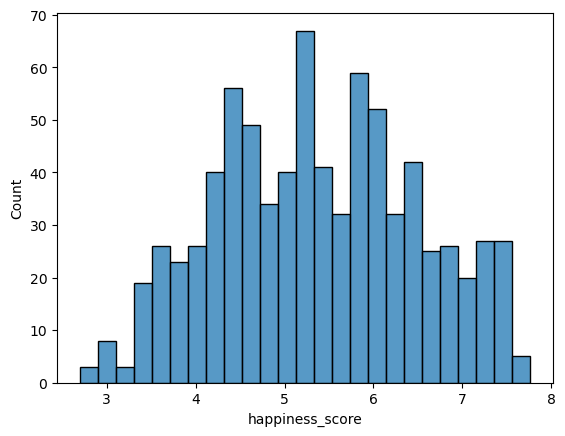

In [19]:
# Check for outliers
sns.histplot(df['happiness_score'], bins=25)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gdp_per_capita', ylabel='Count'>

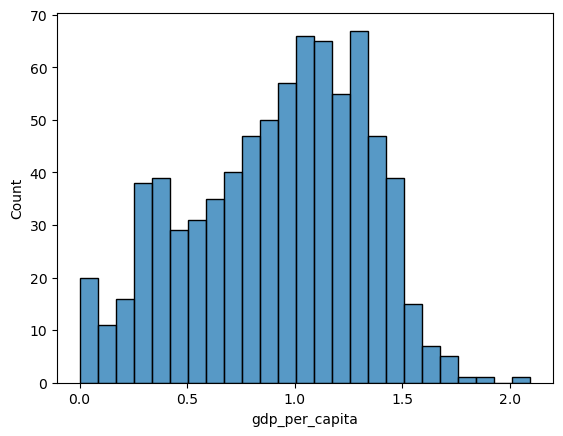

In [20]:
sns.histplot(df['gdp_per_capita'], bins=25)

# Data preparation for regression analysis

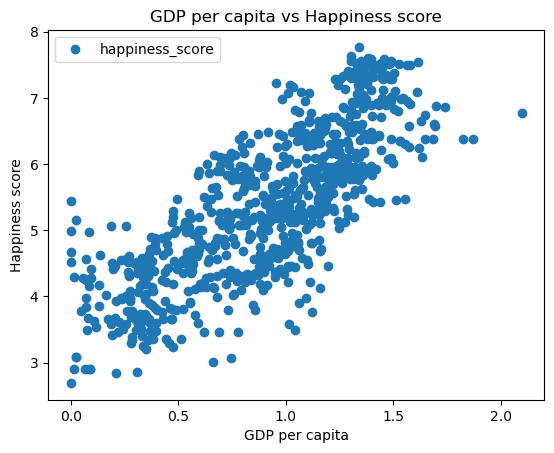

In [22]:
# Create a scatterplot 

df.plot(x = 'gdp_per_capita', y='happiness_score',style='o') 
plt.title('GDP per capita vs Happiness score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness score')  
plt.show()

Hypothesis: The higher the GDP per capita, the higher is the happiness score.

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

In [25]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [26]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [27]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear regression analysis

In [29]:
# Create a regression object
regression = LinearRegression()

In [30]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

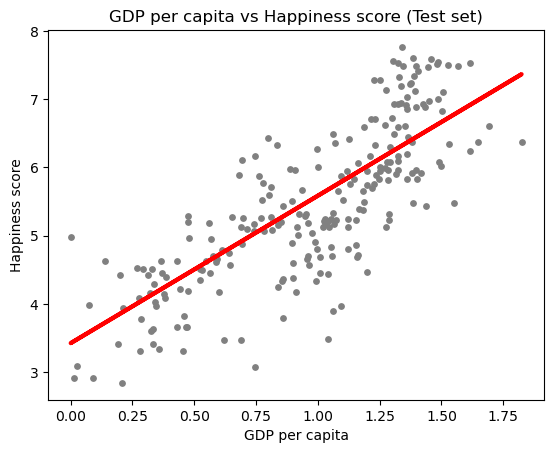

In [75]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness score')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression_test.png'), bbox_inches = 'tight') 
plot_test.show()

The regression line in the scatter plot shows that there's a moderate positive relationship between GDP per capita and the happiness score. However, many data points seem to be quite scattered.

In [34]:
# Create objects that contain the model summary statistics
mse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [35]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


In [36]:
y_predicted

array([[5.80609125],
       [6.44687622],
       [6.73379067],
       [6.43932604],
       [4.03947279],
       [5.92522839],
       [4.25537759],
       [5.02417608],
       [6.50613105],
       [5.98930082],
       [5.71924675],
       [5.94263683],
       [4.19912985],
       [5.39980284],
       [3.45557795],
       [6.36354302],
       [4.45263517],
       [5.37080656],
       [5.84749161],
       [5.27800314],
       [7.36905798],
       [3.58040467],
       [4.66425542],
       [6.36899473],
       [7.07949027],
       [6.39062848],
       [6.08126589],
       [6.4144256 ],
       [4.3550776 ],
       [6.35601448],
       [6.98988328],
       [6.53341121],
       [5.90436673],
       [3.83568289],
       [6.39928197],
       [5.60748681],
       [3.47872606],
       [5.6798517 ],
       [6.21586115],
       [6.04412074],
       [4.13691119],
       [6.44053022],
       [5.0341925 ],
       [5.71777566],
       [6.29976674],
       [6.12708616],
       [5.98175065],
       [5.179

In [37]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


With a MSE of 0.5 and an R2 of 0.6, the model seems to explain the variance in the data moderately well. As can be seen in the scatter plot, the regression line shows a moderate positive relationship, but the data points are still quite scattered around the line.
Concerning bias in the data, the happiness score could be affected by sampling bias, response bias or interviewer bias which may have distorted the data. 

### Compare how the regression fits the training set

In [40]:
# Predict X_train

y_predicted_train = regression.predict(X_train) 

In [41]:
mse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', mse_train)
print('R2 score: ', r2_train)

Slope: [[2.16337475]]
Mean squared error:  0.4688002885509005
R2 score:  0.6245244479606318


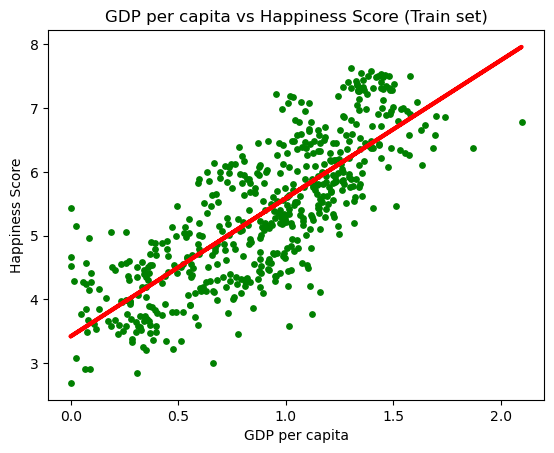

In [77]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness Score (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression_train.png'), bbox_inches = 'tight') 
plot_test.show()

In [44]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_imputed.csv'))